# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import json
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations. Need to change size back to 1500 after testing next cell
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 624


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        city_weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json["coord"]["lon"]
        city_max_temp = city_weather_json["main"]["temp_max"]
        city_humidity = city_weather_json["main"]["humidity"]
        city_clouds = city_weather_json["clouds"]["all"]
        city_wind = city_weather_json["wind"]["speed"]
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | galesong
Processing Record 2 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 3 of Set 1 | flinders
Processing Record 4 of Set 1 | san ignacio
Processing Record 5 of Set 1 | srednekolymsk
Processing Record 6 of Set 1 | peniche
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | saint george
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | digras
Processing Record 14 of Set 1 | ponta do sol
Processing Record 15 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | aquin
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,galesong,-5.3166,119.3661,86.02,73,100,12.46,ID,1672628706
1,flinders,-34.5833,150.8552,83.17,59,1,8.01,AU,1672628706
2,san ignacio,17.1561,-89.0714,70.21,99,22,3.47,BZ,1672628442
3,srednekolymsk,67.4500,153.6833,-34.29,98,99,5.70,RU,1672628707
4,peniche,39.3558,-9.3811,53.92,64,69,12.64,PT,1672628707


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,galesong,-5.3166,119.3661,86.02,73,100,12.46,ID,1672628706
1,flinders,-34.5833,150.8552,83.17,59,1,8.01,AU,1672628706
2,san ignacio,17.1561,-89.0714,70.21,99,22,3.47,BZ,1672628442
3,srednekolymsk,67.4500,153.6833,-34.29,98,99,5.70,RU,1672628707
4,peniche,39.3558,-9.3811,53.92,64,69,12.64,PT,1672628707


In [10]:
# Extract Date from UTC from record at index 0 to use in plot titles
city_data_df['Date'] = city_data_df['Date'].apply(str)
city_data_df['Date'] = pd.to_datetime(city_data_df['Date'], unit='s').dt.date
date = city_data_df['Date'][0]
date

datetime.date(2023, 1, 2)

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

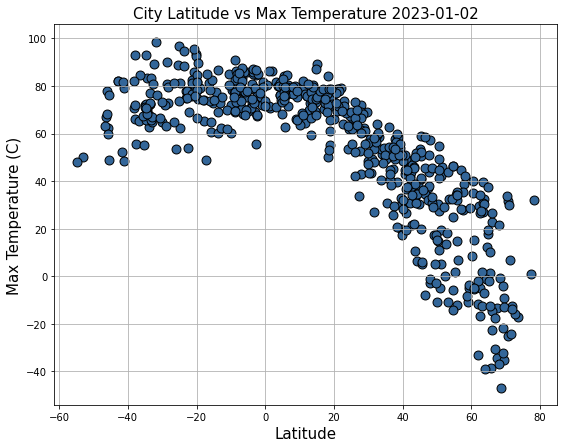

In [11]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x='Lat', y='Max Temp', s=80, c='#336699', edgecolors='black',  figsize=(9, 7))

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize = 15)
plt.ylabel('Max Temperature (C)', fontsize = 15)
plt.title(f'City Latitude vs Max Temperature {date}', fontsize = 15)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

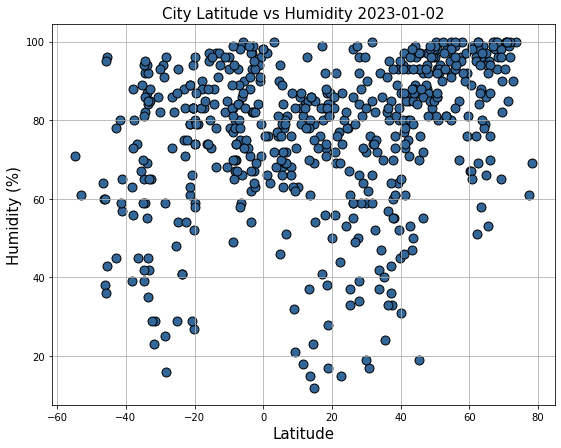

In [12]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x='Lat', y='Humidity', s=80, c='#336699', edgecolors='black',  figsize=(9, 7))

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize = 15)
plt.ylabel('Humidity (%)', fontsize = 15)
plt.title(f'City Latitude vs Humidity {date}', fontsize = 15)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

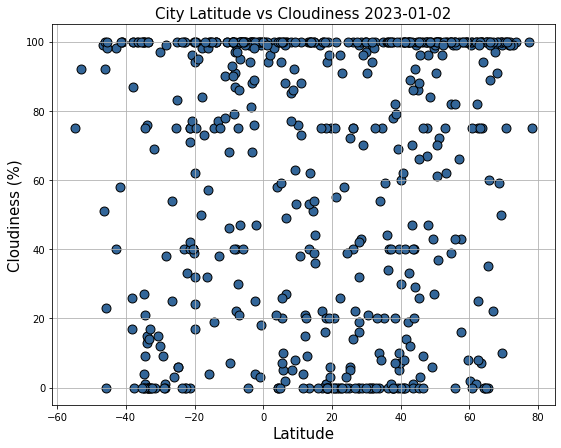

In [13]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x='Lat', y='Cloudiness', s=80, c='#336699', edgecolors='black',  figsize=(9, 7))

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize = 15)
plt.ylabel('Cloudiness (%)', fontsize = 15)
plt.title(f'City Latitude vs Cloudiness {date}', fontsize = 15)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

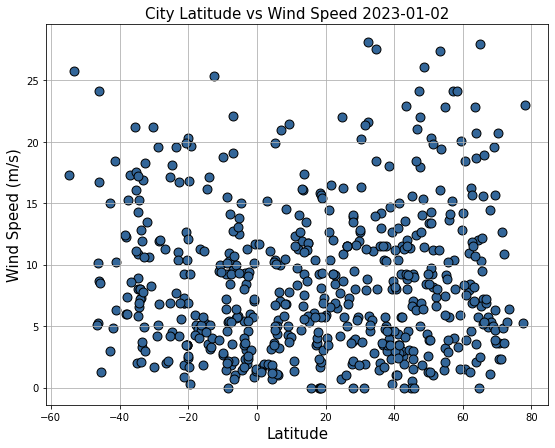

In [14]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x='Lat', y='Wind Speed', s=80, c='#336699', edgecolors='black',  figsize=(9, 7))

# Incorporate the other graph properties
plt.xlabel('Latitude', fontsize = 15)
plt.ylabel('Wind Speed (m/s)', fontsize = 15)
plt.title(f'City Latitude vs Wind Speed {date}', fontsize = 15)
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,san ignacio,17.1561,-89.0714,70.21,99,22,3.47,BZ,2023-01-02
3,srednekolymsk,67.4500,153.6833,-34.29,98,99,5.70,RU,2023-01-02
4,peniche,39.3558,-9.3811,53.92,64,69,12.64,PT,2023-01-02
5,saint george,37.1041,-113.5841,45.25,85,100,10.36,US,2023-01-02
10,digras,20.1167,77.7167,66.24,50,0,5.91,IN,2023-01-02


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,galesong,-5.3166,119.3661,86.02,73,100,12.46,ID,2023-01-02
1,flinders,-34.5833,150.8552,83.17,59,1,8.01,AU,2023-01-02
6,vaini,-21.2000,-175.2000,78.96,89,75,6.91,TO,2023-01-02
7,rikitea,-23.1203,-134.9692,77.76,75,100,11.05,PF,2023-01-02
8,bredasdorp,-34.5322,20.0403,65.52,92,21,10.83,ZA,2023-01-02


###  Temperature vs. Latitude Linear Regression Plot

Text(0, 0.5, 'Max Temperature (C)')

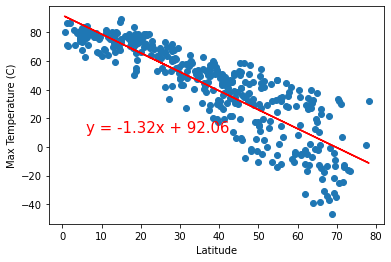

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

linear_regression(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')


Text(0, 0.5, 'Max Temperature (C)')

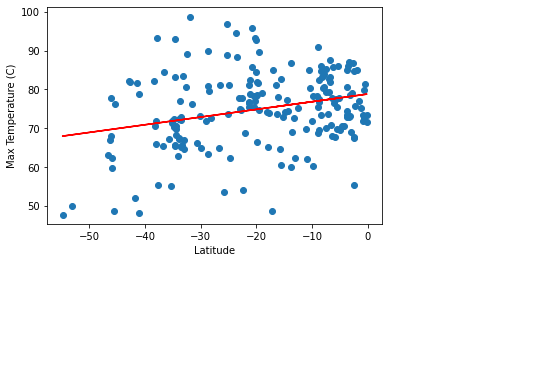

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

linear_regression(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')

**Discussion about the linear relationship:** Their appears to be a linear relationship between latitude and max temp in both the northern and southern hemiphere. In the northern hemisphere their is a negative correlation, with temps getting lower as the latitude increases. In the southern hemiphere it is the opposite. This is to be expected, as the equator at latitude zero should have the warmest temps since the sun's rays are most direct. 

### Humidity vs. Latitude Linear Regression Plot

Text(0, 0.5, 'Humidity (%)')

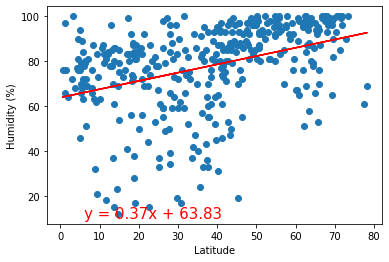

In [20]:
# Northern Hemispherex_values = northern_hemi_df['Lat']
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

linear_regression(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

Text(0, 0.5, 'Humidity (%)')

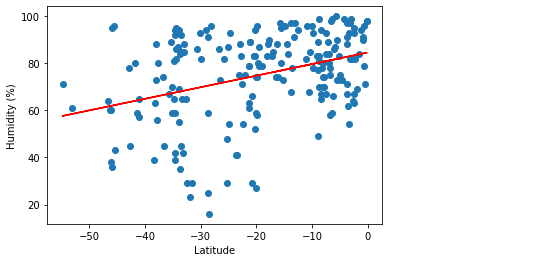

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

linear_regression(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

**Discussion about the linear relationship:** There appears to be some correlation between humidity and latitude in the northern hemisphere given the upward-sloping line. There is only a mild linear relationship between latitude and humidity in the southern hemisphere

### Cloudiness vs. Latitude Linear Regression Plot

Text(0, 0.5, 'Cloudiness (%)')

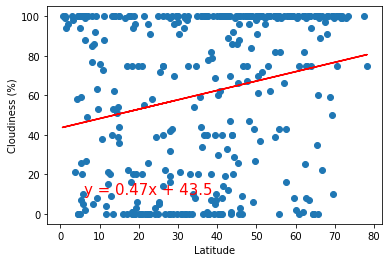

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

linear_regression(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

Text(0, 0.5, 'Cloudiness (%)')

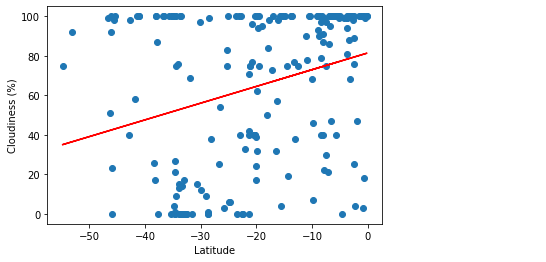

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

linear_regression(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

**Discussion about the linear relationship:** Given how far away most points in the scatter plot are from the regression line, there doesn't appear to be a strong predictive linear relationship between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

Text(0, 0.5, 'Wind Speed (m/s)')

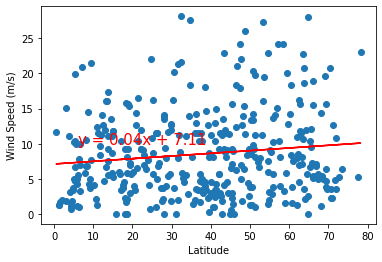

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

linear_regression(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

Text(0, 0.5, 'Wind Speed (m/s)')

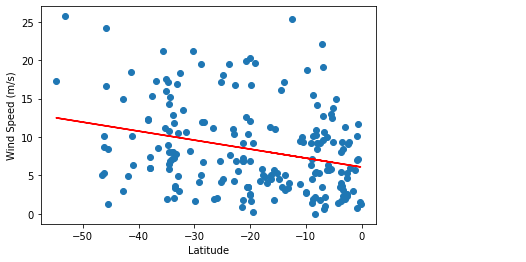

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

linear_regression(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

**Discussion about the linear relationship:** The realtionship between latitude and wind speed in the northern hemisphere appears weak. Wind speeads in the southern hemisphere do appear to slow down as you approach the equator.